# Notebook to analyse the apparent magnitudes of this AGN

Import the necessary packages

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from alerce.core import Alerce
client = Alerce()
#stamps = client.get_stamps("ZTF18absrlhv")

Define functions for weighted mean and the corresponding standard deviations

In [ ]:
def weighted_stats(mags, errors):
    assert len(mags) == len(errors), print(f"⚠️ Measurements and errors need to have the same dimensions, but have dimensions {len(mags)} and {len(errors)}.")
    N = len(mags)
    
    # Inverse variance weighting
    weights = 1/errors**2
    mean = np.sum(mags*weights) / np.sum(weights)
    
    # This is the error on the wighted mean! Not on the measurements themselves
    std = np.sqrt(1 / np.sum(weights))
    return mean, std

Query the data using alerce and extract the columns

In [116]:
# Getting lightcurve for an object
lc = client.query_lightcurve("ZTF18absrlhv",
                                     format="json")

In [117]:
detections = pd.DataFrame(lc["detections"])
nondetections = pd.DataFrame(lc["non_detections"])

print(np.shape(detections))
#print(np.shape(nondetections))

csv = pd.read_csv("detections.csv")

print(detections.columns)
print(csv.columns)
#print(nondetections.columns)

(2435, 34)
Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')
Index(['aid', 'candid', 'corrected', 'dec', 'dubious', 'e_dec', 'e_mag',
       'e_mag_corr', 'e_mag_corr_ext', 'e_ra', 'fid', 'has_stamp', 'isdiffpos',
       'mag', 'mag_corr', 'mjd', 'oid', 'parent_candid', 'pid', 'ra', 'sid',
       'tid', 'diffmaglim', 'distnr', 'drb', 'drbversion', 'magap', 'magapbig',
       'nid', 'rb', 'rbversion', 'rfid', 'sigmagap', 'sigmagapbig',
       'step_id_corr'],
      dtype='object')


"magpsf_corr": Corrected PSF magnitude\
"sigmapsf_corr": Error of the corrected PSF magnitude assuming no contribution from an extended component\
"sigmapsf_corr_ext": Error of the corrected PSF magnitude assuming a contribution from an extended component

# Perform analysis using query

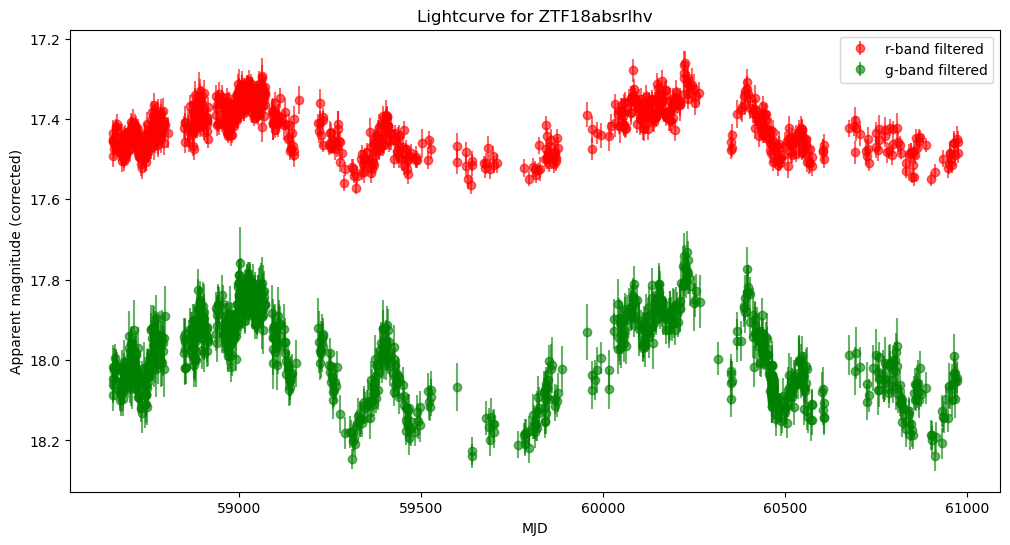

In [118]:
# Getting lightcurve for an object
lc = client.query_lightcurve("ZTF18absrlhv", format="json")

detections = pd.DataFrame(lc["detections"])

# Filter valid data in the r-band
r = detections[
    (detections["dubious"] == False)
    & (detections["drb"] > 0.5)
    & (detections["sigmapsf_corr_ext"] < 1e2)  # remove unreasonably large errors
    & (detections["fid"] == 2) # select only r-band
]

g = detections[
    (detections["dubious"] == False)
    & (detections["drb"] > 0.5)
    & (detections["sigmapsf_corr_ext"] < 1e2)  # remove unreasonably large errors
    & (detections["fid"] == 1) # select only g-band
]

plt.figure(figsize=(12,6))

#plt.plot(good["mjd"], good["magpsf_corr"], "o")
plt.errorbar(r["mjd"], r["magpsf_corr"], yerr=r["sigmapsf_corr_ext"], 
             fmt="o", alpha=0.6, color="red", label="r-band filtered")
plt.errorbar(g["mjd"], g["magpsf_corr"], yerr=g["sigmapsf_corr_ext"], 
             fmt="o", alpha=0.6, color="green", label="g-band filtered")

plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("Apparent magnitude (corrected)")
plt.title("Lightcurve for ZTF18absrlhv")
plt.savefig("lightcurve_query_both.png", bbox_inches="tight")
plt.show()

# Perform analysis using detections.csv

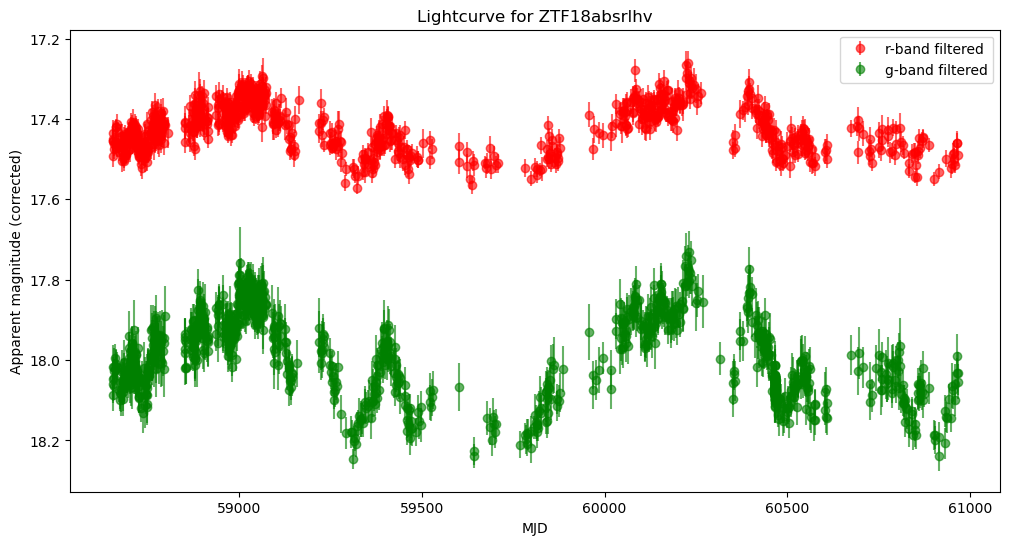

In [119]:
detections = pd.read_csv("detections.csv")

# Filter valid data in the r-band
r = detections[
    (detections["dubious"] == False)
    & (detections["drb"] > 0.5)
    & (detections["e_mag_corr_ext"] < 1e2)  # remove unreasonably large errors
    & (detections["fid"] == 2) # select only r-band
]

g = detections[
    (detections["dubious"] == False)
    & (detections["drb"] > 0.5)
    & (detections["e_mag_corr_ext"] < 1e2)  # remove unreasonably large errors
    & (detections["fid"] == 1) # select only g-band
]

plt.figure(figsize=(12,6))

#plt.plot(good["mjd"], good["magpsf_corr"], "o")
plt.errorbar(r["mjd"], r["mag_corr"], yerr=r["e_mag_corr_ext"], 
             fmt="o", alpha=0.6, color="red", label="r-band filtered")
plt.errorbar(g["mjd"], g["mag_corr"], yerr=g["e_mag_corr_ext"], 
             fmt="o", alpha=0.6, color="green", label="g-band filtered")

plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("Apparent magnitude (corrected)")
plt.title("Lightcurve for ZTF18absrlhv")
plt.savefig("lightcurve_both.png", bbox_inches="tight")
plt.show()


Once again find the midpoint

In [120]:
mid_point = (g['mjd'].min() + g['mjd'].max()) / 2
print(mid_point)
mid_point = (r['mjd'].min() + r['mjd'].max()) / 2
print(mid_point)

59810.24875580007
59810.155387749895


Perform analysis for red band

Green band statistics:
First half weighted mean = 17.423 ± 0.001
Second half weighted mean = 17.428 ± 0.001

Difference in apparent magnitudes:  0.004824979263567286
Total uncertainty:  0.14000047161131998
The difference in apparent magnitude is 3.45% of the total uncertainty


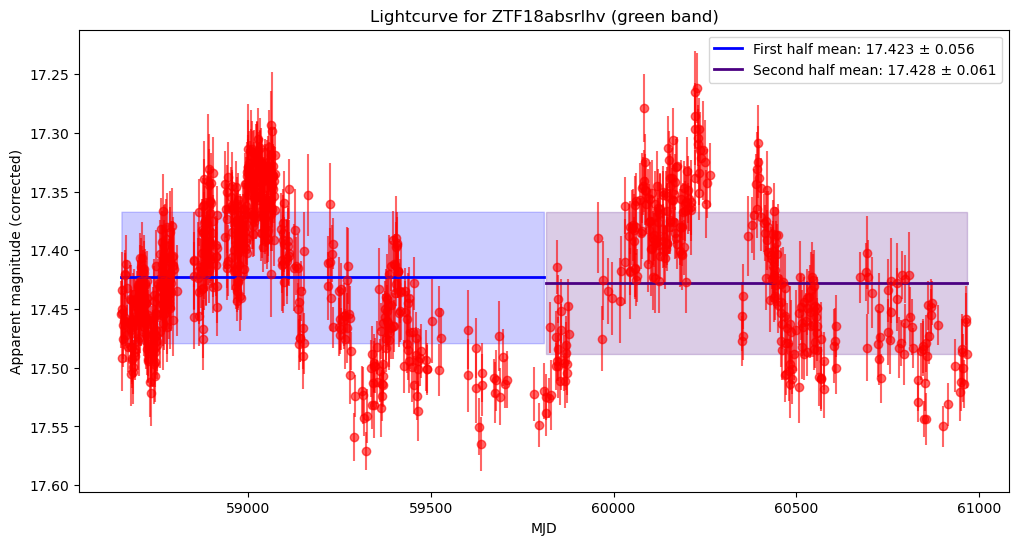

In [121]:
first_half = r[r['mjd'] <= mid_point]
second_half = r[r['mjd'] > mid_point]

mean1, std1 = weighted_stats(first_half["mag_corr"], first_half["e_mag_corr_ext"])
mean2, std2 = weighted_stats(second_half["mag_corr"], second_half["e_mag_corr_ext"])

print("Green band statistics:")
print(f"First half weighted mean = {mean1:.3f} ± {std1:.3f}")
print(f"Second half weighted mean = {mean2:.3f} ± {std2:.3f}\n")

diff = np.abs(mean1 - mean2)
total_err = np.sqrt(scatter1**2 + scatter2**2)

Nsig = diff/total_err

print("Difference in apparent magnitudes: ", diff)
print("Total uncertainty: ", total_err)

print(f"The difference in apparent magnitude is {Nsig * 100:.2f}% of the total uncertainty")

# =============================================================

plt.figure(figsize=(12,6))

plt.errorbar(r["mjd"], r["mag_corr"], yerr=r["e_mag_corr_ext"], 
             fmt="o", alpha=0.6, color="red")

# Obtain statistics of the actual scatter
scatter1 = first_half['mag_corr'].std()
scatter2 = second_half['mag_corr'].std()

plt.plot(first_half["mjd"], [mean1]*len(first_half), color="blue", label=f"First half mean: {mean1:.3f} ± {scatter1:.3f}", lw=2)
plt.fill_between(first_half["mjd"], [mean1+scatter1]*len(first_half), [mean1-scatter1]*len(first_half), color="blue", alpha=0.2)

plt.plot(second_half["mjd"], [mean2]*len(second_half), color="indigo", label=f"Second half mean: {mean2:.3f} ± {scatter2:.3f}", lw=2)
plt.fill_between(second_half["mjd"], [mean2+scatter2]*len(second_half), [mean2-scatter2]*len(second_half), color="indigo", alpha=0.2)

plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("Apparent magnitude (corrected)")
plt.title("Lightcurve for ZTF18absrlhv (green band)")
plt.legend()
plt.savefig("lc_analysis_red.png", dpi=150, bbox_inches="tight")
plt.show()

Perform analysis for green band

Green band statistics:
First half weighted mean = 17.980 ± 0.002
Second half weighted mean = 18.043 ± 0.001

Difference in apparent magnitudes:  0.06318101064471549
Total uncertainty:  0.08260251703202215
The difference in apparent magnitude is 76.49% of the total uncertainty


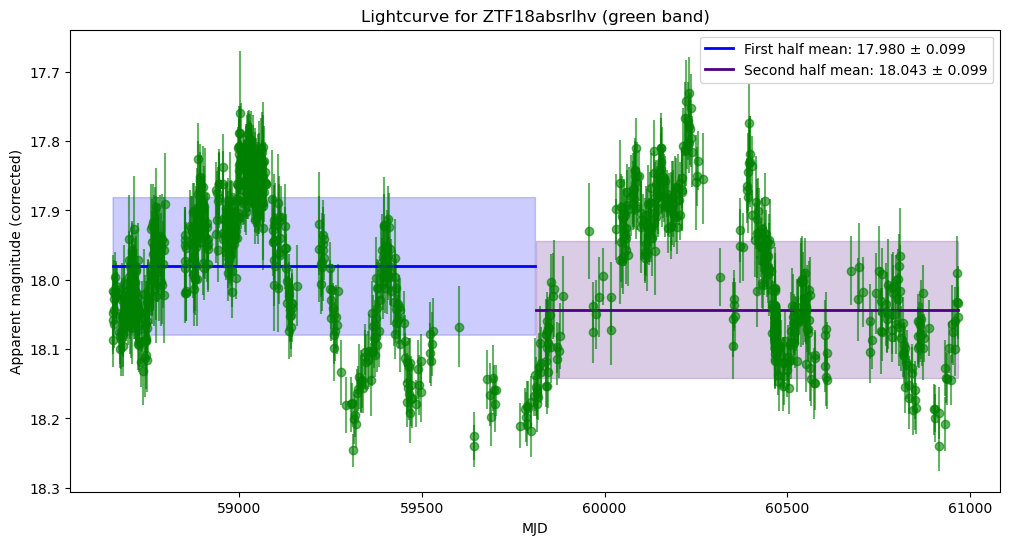

In [122]:
first_half = g[g['mjd'] <= mid_point]
second_half = g[g['mjd'] > mid_point]

mean1, std1 = weighted_stats(first_half["mag_corr"], first_half["e_mag_corr_ext"])
mean2, std2 = weighted_stats(second_half["mag_corr"], second_half["e_mag_corr_ext"])

print("Green band statistics:")
print(f"First half weighted mean = {mean1:.3f} ± {std1:.3f}")
print(f"Second half weighted mean = {mean2:.3f} ± {std2:.3f}\n")

diff = np.abs(mean1 - mean2)
total_err = np.sqrt(scatter1**2 + scatter2**2)

Nsig = diff/total_err

print("Difference in apparent magnitudes: ", diff)
print("Total uncertainty: ", total_err)

print(f"The difference in apparent magnitude is {Nsig * 100:.2f}% of the total uncertainty")

# =============================================================

plt.figure(figsize=(12,6))

plt.errorbar(g["mjd"], g["mag_corr"], yerr=g["e_mag_corr_ext"], 
             fmt="o", alpha=0.6, color="green")

# Obtain statistics of the actual scatter
scatter1 = first_half['mag_corr'].std()
scatter2 = second_half['mag_corr'].std()

plt.plot(first_half["mjd"], [mean1]*len(first_half), color="blue", label=f"First half mean: {mean1:.3f} ± {scatter1:.3f}", lw=2)
plt.fill_between(first_half["mjd"], [mean1+scatter1]*len(first_half), [mean1-scatter1]*len(first_half), color="blue", alpha=0.2)

plt.plot(second_half["mjd"], [mean2]*len(second_half), color="indigo", label=f"Second half mean: {mean2:.3f} ± {scatter2:.3f}", lw=2)
plt.fill_between(second_half["mjd"], [mean2+scatter2]*len(second_half), [mean2-scatter2]*len(second_half), color="indigo", alpha=0.2)

plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("Apparent magnitude (corrected)")
plt.title("Lightcurve for ZTF18absrlhv (green band)")
plt.legend()
plt.savefig("lc_analysis_green.png", dpi=150, bbox_inches="tight")
plt.show()